In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [97]:
df=pd.read_csv('power plant.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [98]:
table=[]


for i in df.columns:
    table.append([i,df[i].nunique(),df[i].drop_duplicates().values])
    
pd.DataFrame(table,columns=['Features','Unique_Number','Values'])

,Features,Unique_Number,Values
0,country,1,[IND]
1,country_long,1,[India]
2,name,908,"[ACME Solar Tower, ADITYA CEMENT WORKS, AES Sa..."
3,gppd_idnr,908,"[WRI1020239, WRI1019881, WRI1026669, IND000000..."
4,capacity_mw,365,"[2.5, 98.0, 39.2, 135.0, 1800.0, 250.0, 60.0, ..."
5,latitude,837,"[28.1839, 24.7663, 21.9038, 23.8712, 21.9603, ..."
6,longitude,828,"[73.2407, 74.609, 69.3732, 91.3602, 82.4091, 6..."
7,primary_fuel,8,"[Solar, Coal, Wind, Gas, Hydro, Biomass, Oil, ..."
8,other_fuel1,3,"[nan, Oil, Cogeneration, Gas]"
9,other_fuel2,1,"[nan, Oil]"


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [100]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

checking how much percentage of data is missing

In [101]:
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]
print(len(missing_features))
missing_features

17


['latitude',
 'longitude',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_data_source',
 'estimated_generation_gwh']

In [102]:
for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean()*100,4),'% missing values')

latitude 5.0661 % missing values
longitude 5.0661 % missing values
other_fuel1 78.0837 % missing values
other_fuel2 99.8899 % missing values
other_fuel3 100.0 % missing values
commissioning_year 41.8502 % missing values
owner 62.3348 % missing values
geolocation_source 2.0925 % missing values
wepp_id 100.0 % missing values
year_of_capacity_data 42.7313 % missing values
generation_gwh_2013 57.7093 % missing values
generation_gwh_2014 55.837 % missing values
generation_gwh_2015 53.1938 % missing values
generation_gwh_2016 51.8722 % missing values
generation_gwh_2017 51.2115 % missing values
generation_data_source 50.4405 % missing values
estimated_generation_gwh 100.0 % missing values


As per the observation:
1.  17 features having the missing values data
2.  (80-100)% of data is missing values in 4 features.
3.  (50-80)% of data is missing values in 7 features.
4.  Remaining 6 features having missing values in range of (0-10)%.

In [103]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print('Length Of Numeric Features',len(numeric_features))
numeric_features

Length Of Numeric Features 13


['capacity_mw',
 'latitude',
 'longitude',
 'other_fuel3',
 'commissioning_year',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'estimated_generation_gwh']

In [104]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print("Lenth Of Categorical Features",len(categorical_features))
categorical_features

Lenth Of Categorical Features 12


['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [105]:
year_features=[features for features in numeric_features if 'year' in features]
print('Length Of Year_Feature',len(year_features))
year_features

Length Of Year_Feature 2


['commissioning_year', 'year_of_capacity_data']

As per our data set we have 3 type of features
1.  categorical Data
2.  numerical Data
3.  year Data

Check how many are discrete data and comtinuous data

In [106]:
discrete_features=[features for features in numeric_features if len(df[features].unique())<25 and features not in year_features]
print('Length Of Discrete Features',len(discrete_features))
discrete_features

Length Of Discrete Features 3


['other_fuel3', 'wepp_id', 'estimated_generation_gwh']

In [107]:
continuous_features=[features for features in numeric_features if len(df[features].unique())>25 and features not in year_features]
print('Length Of Continue_Features',len(continuous_features))
continuous_features

Length Of Continue_Features 8


['capacity_mw',
 'latitude',
 'longitude',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

#Visualization 

Text(0, 0.5, 'No Of Plants')

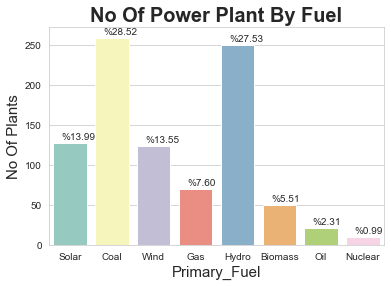

In [108]:
sns.set_style('whitegrid')
ax=sns.countplot(x=df['primary_fuel'],data=df,palette='Set3')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/908*100), (p.get_x()+0.2, p.get_height()+5))
plt.title('No Of Power Plant By Fuel',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel("Primary_Fuel",fontsize=15)
plt.ylabel('No Of Plants',fontsize=15)

As per the data Hydro and Coal Covers almost 50% of power plants

Text(0, 0.5, 'commissioning_year')

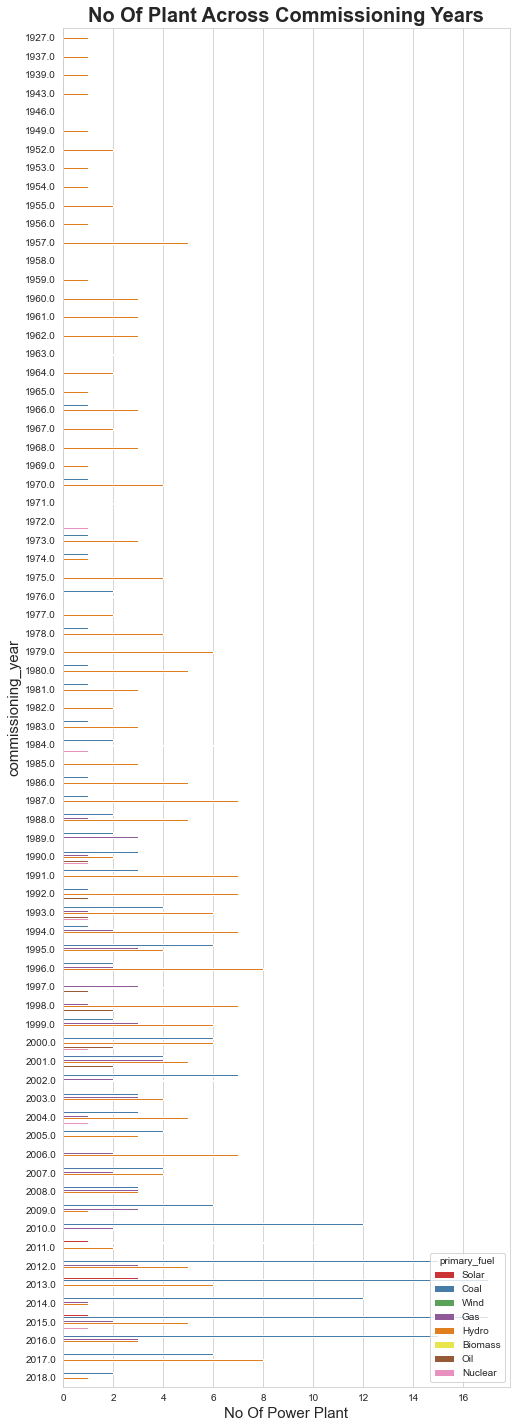

In [109]:
plt.figure(figsize=(8,25))
sns.countplot(y=df['commissioning_year'],palette='Set1',hue=df['primary_fuel'],data=df)
plt.title('No Of Plant Across Commissioning Years',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel("No Of Power Plant",fontsize=15)
plt.ylabel('commissioning_year',fontsize=15)

In [110]:
cp=pd.crosstab(df['commissioning_year'],df['primary_fuel'])
cp

primary_fuel,Coal,Gas,Hydro,Nuclear,Oil,Solar
commissioning_year,,,,,,
1927.0,0,0,1,0,0,0
1937.0,0,0,1,0,0,0
1939.0,0,0,1,0,0,0
1943.0,0,0,1,0,0,0
1946.0,0,0,1,0,0,0
...,...,...,...,...,...,...
2014.0,12,1,1,0,0,3
2015.0,17,2,5,1,0,1
2016.0,15,3,3,0,0,0


From This Chart we can see that india started their Hydro plant in 1927.

From 1927 to 1965 we have only Hydro power plant and also in less no of plant.

First coal plant start on 1966

First Nuclear Plant was start on 1972

Gas Plant start on 1989

We had done max commising of plant in 2013 is around 28 plant.about 02 plant in one month

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

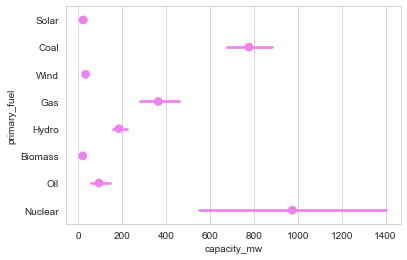

In [111]:
sns.pointplot(y=df['primary_fuel'],x=df['capacity_mw'],data=df,color='violet',join=False)

Nucler power plant having high capacity from (600-1400mw) and solar,Biomass having less.

Text(0, 0.5, 'Number Of Plant')

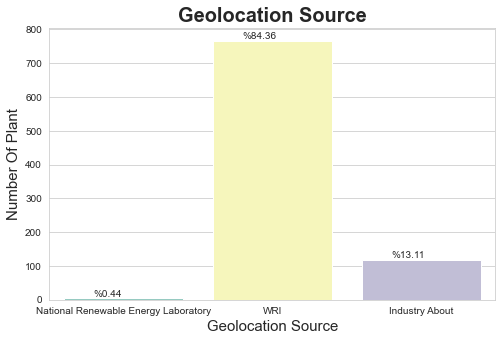

In [112]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax=sns.countplot(x=df['geolocation_source'],data=df,palette='Set3')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/908*100), (p.get_x()+0.2, p.get_height()+5))
sns.set_style('whitegrid')
plt.title('Geolocation Source',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Geolocation Source',fontsize=15)
plt.ylabel('Number Of Plant',fontsize=15)

Most of the Geolocation Source are coming from WRI Geolocation_source.as this features have about 2.0% data missing so we need to fill missing values with most frequent data

Text(0, 0.5, 'Number Of Plant')

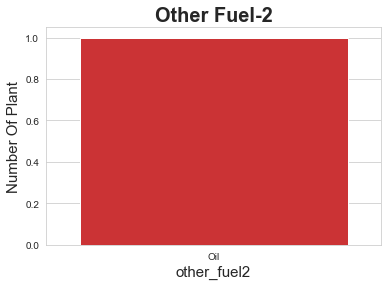

In [113]:
sns.countplot(x=df['other_fuel2'],data=df,palette='Set1')
plt.title('Other Fuel-2',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('other_fuel2',fontsize=15)
plt.ylabel('Number Of Plant',fontsize=15)

other Fuel2 having only one type but it has 99% nan values so in data cleaning we will drop this

Text(0, 0.5, 'Number Of Plant')

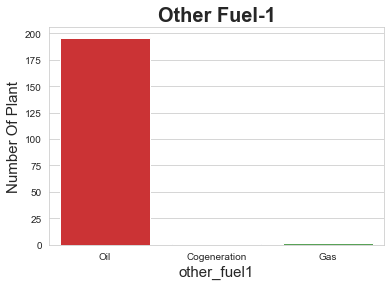

In [114]:
sns.countplot(x=df['other_fuel1'],data=df,palette='Set1')
plt.title('Other Fuel-1',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('other_fuel1',fontsize=15)
plt.ylabel('Number Of Plant',fontsize=15)

From Above 2 chart we can see that Other fuel they are using Oli mostly so we will fill null values with  Oil in OtherFule1

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

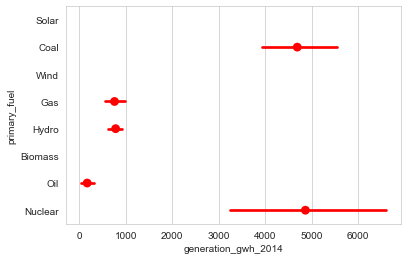

In [115]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2014'],data=df,color='red',join=False)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

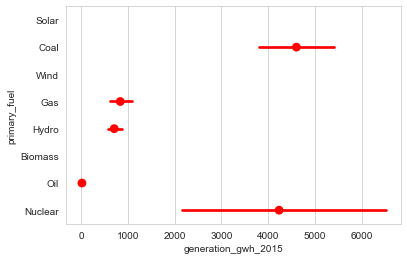

In [116]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2015'],data=df,color='red',join=False)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

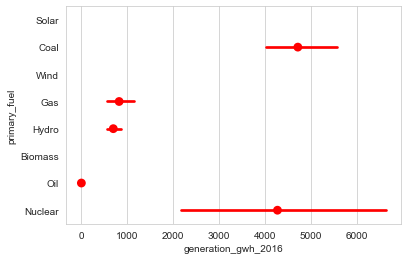

In [117]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2016'],data=df,color='red',join=False)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

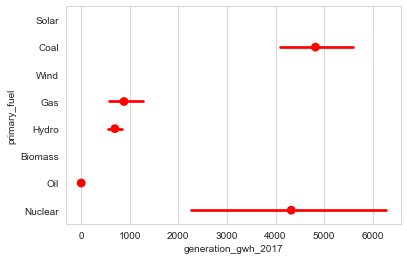

In [118]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2017'],data=df,color='red',join=False)

In Almost all years nuclear Power Plant is high
1. 2016 Capacity Of Nuclear power plant(+7000mw) is highest as compair with other years.

2. 2017 Coal plant running with highest capacity

Text(0, 0.5, 'Number Of Plant')

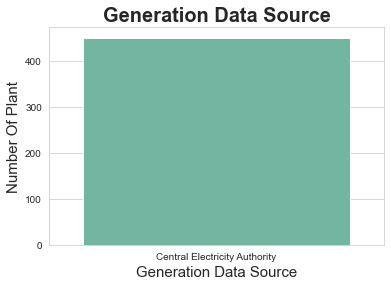

In [119]:
sns.countplot(x=df['generation_data_source'],data=df,palette='Set2')
plt.title('Generation Data Source',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Generation Data Source',fontsize=15)
plt.ylabel('Number Of Plant',fontsize=15)

All Power Generation Sources Comes from CEA so we need to fill 50% of missing values with that data.

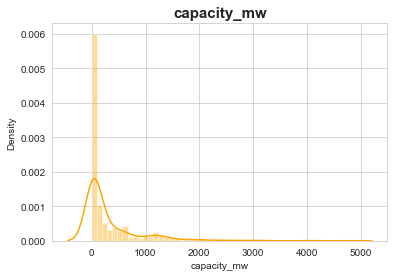

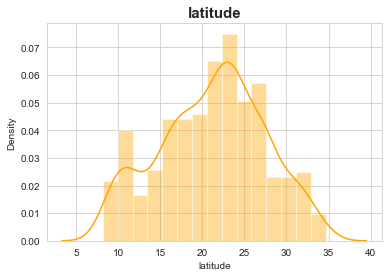

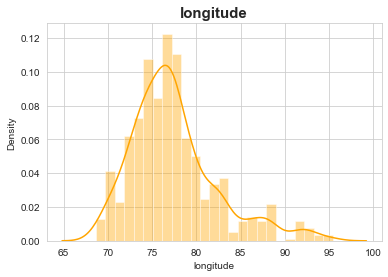

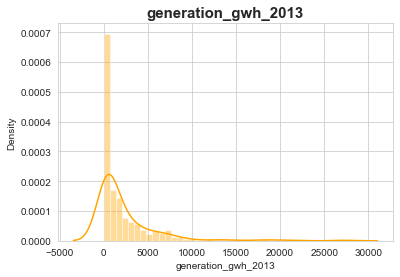

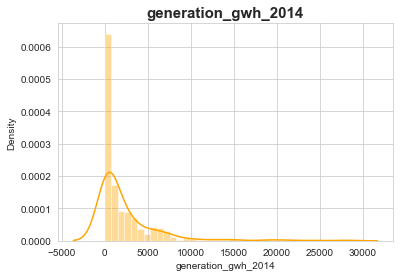

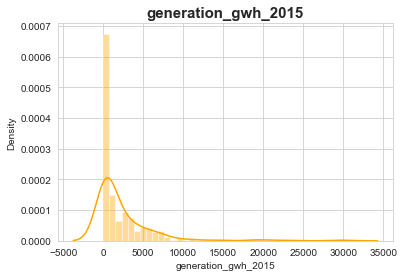

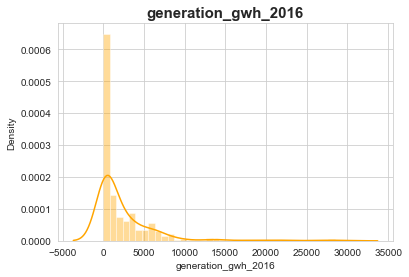

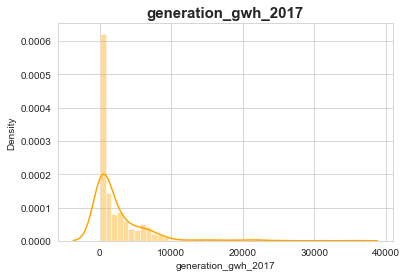

In [120]:
for i in continuous_features:
    plt.figure()
    sns.distplot(df[i],color='orange')
    plt.title(i,fontsize=15,fontweight='bold')

as per the dist plot charts skewness is present in the data

In [121]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


From Statastical We observe that mean of power generation increases from 2013 to 2017.that show that power demand also increases.

Max Capacity is 4760mw and average is 321mw.

As some features having 100% Null Values so we will drop than and also some un-necessary featurs we drop them.

In [122]:
df.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','country','country_long','gppd_idnr','owner','url','year_of_capacity_data'],axis=1,inplace=True)

In [123]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.050107,0.198377,0.294661,0.823513,0.850698,0.855834,0.881209,0.896785
latitude,0.050107,1.000000,0.031501,0.120944,0.050720,0.059826,0.048103,0.040832,0.039711
longitude,0.198377,0.031501,1.000000,0.114167,0.017461,0.013678,0.023087,0.051128,0.049320
commissioning_year,0.294661,0.120944,0.114167,1.000000,0.137351,0.160896,0.171964,0.195301,0.193421
generation_gwh_2013,0.823513,0.050720,0.017461,0.137351,1.000000,0.968904,0.908396,0.894752,0.859459
generation_gwh_2014,0.850698,0.059826,0.013678,0.160896,0.968904,1.000000,0.961105,0.937091,0.912585
generation_gwh_2015,0.855834,0.048103,0.023087,0.171964,0.908396,0.961105,1.000000,0.974955,0.940274
generation_gwh_2016,0.881209,0.040832,0.051128,0.195301,0.894752,0.937091,0.974955,1.000000,0.972054
generation_gwh_2017,0.896785,0.039711,0.049320,0.193421,0.859459,0.912585,0.940274,0.972054,1.000000


<AxesSubplot:>

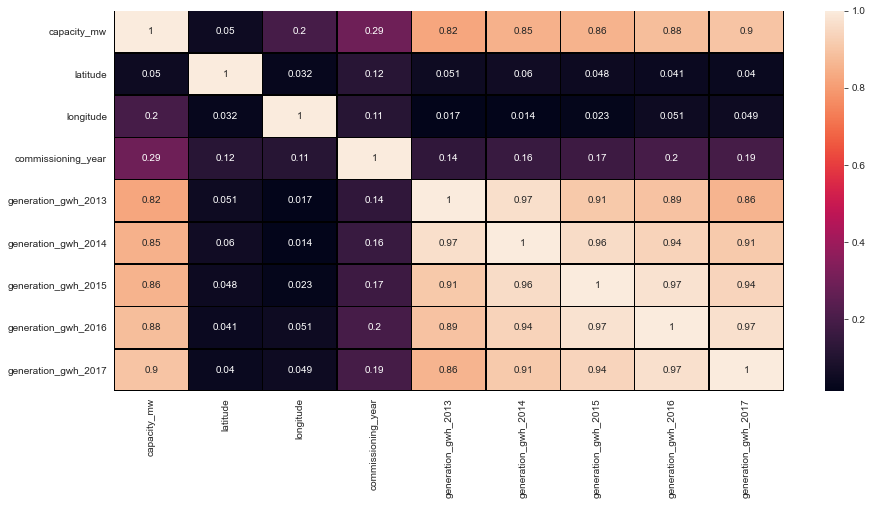

In [124]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black')

From this Corelation chart we see that some features having high relation and having multi linearity.

lattitude and longitude having less relation with capacity

# Filling NAN Values

In [125]:
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

In [126]:
df['latitude']=df['latitude'].fillna(df['latitude'].median())
df['longitude']=df['longitude'].fillna(df['longitude'].median())

In [127]:
from sklearn.impute import SimpleImputer

In [128]:
imp=SimpleImputer(strategy='most_frequent')

In [129]:
df['other_fuel1']=imp.fit_transform(df['other_fuel1'].values.reshape(-1,1))
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['generation_data_source']=imp.fit_transform(df['generation_data_source'].values.reshape(-1,1))

In [130]:
df.isnull().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

Now our data is having all the values

We have Latest power plant commissiong in 2018. so we convert this year into the Age means how the plant was old.

In [131]:
df['commissioning_year']=[2018]-df['commissioning_year']
df['commissioning_year']

0       7.0
1       5.0
2       5.0
3      14.0
4       3.0
       ... 
903     2.0
904     5.0
905     5.0
906     5.0
907     5.0
Name: commissioning_year, Length: 908, dtype: float64

In [132]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,7.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,5.0,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,5.0,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,14.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,3.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2.0,Central Electricity Authority,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,5.0,Karnataka Power Corporation Limited,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,5.0,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,5.0,Hindustan Zinc ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority


In [133]:
#install library
!pip install folium

In [134]:
import folium

In [135]:
plant_location=df[['latitude','longitude','name']]
map = folium.Map(location=[plant_location.latitude.mean(), plant_location.longitude.mean()], zoom_start=5, control_scale=True)
for index, location_info in plant_location.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["name"]).add_to(map)

In [136]:
map

In [137]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [138]:
l=['primary_fuel','other_fuel1','geolocation_source','generation_data_source','source']

In [139]:
for i in l:
    df[i]=le.fit_transform(df[i])
    df

In [140]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,6,2,7.0,109,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,1,2,5.0,174,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,7,2,5.0,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,AGARTALA GT,135.0,23.8712,91.3602,2,2,14.0,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,AKALTARA TPP,1800.0,21.9603,82.4091,1,2,3.0,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0


In [141]:
#droping un-necessary columns
df.drop(['generation_data_source','source','name'],axis=1,inplace=True)

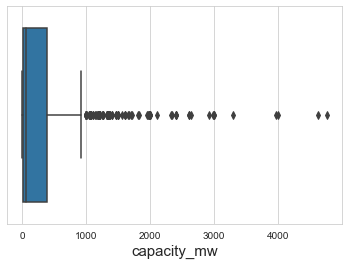

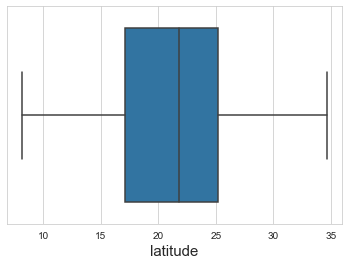

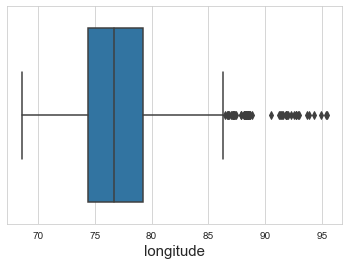

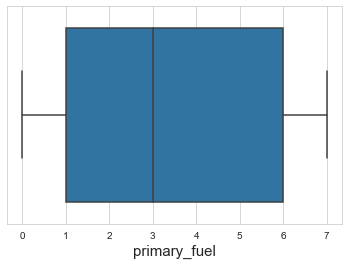

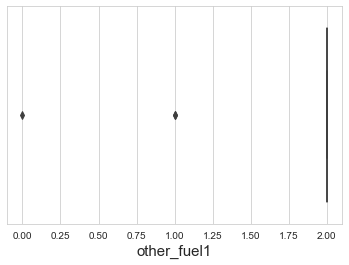

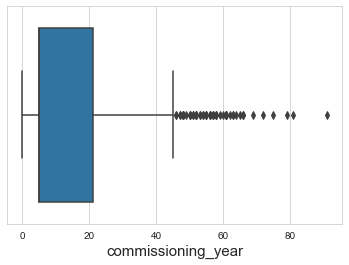

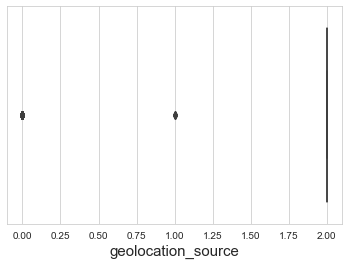

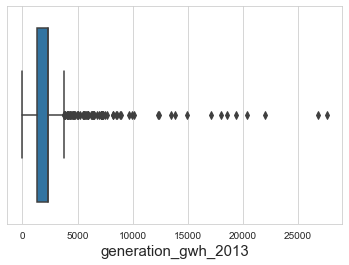

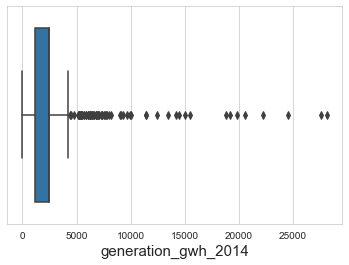

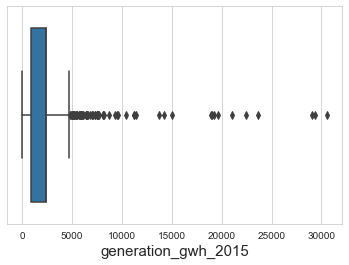

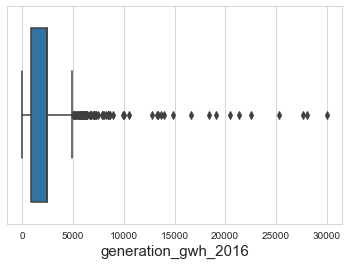

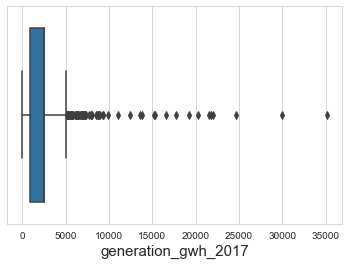

In [143]:
for i in df.columns:
    plt.figure()
    sns.boxplot(x=df[i])
    plt.xlabel(i,fontsize=15)

Data Cleaning

In [144]:
from scipy.stats import zscore

In [145]:
z=np.abs(zscore(df))

In [146]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
       184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
       309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
       365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
       494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
       530, 533, 539, 542, 547, 575, 584, 602, 622, 639, 649, 649, 649,
       649, 649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696,
       696, 707, 710, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727,
       727, 727, 727, 727, 727, 729, 787, 787, 787, 787, 787, 787, 789,
       808, 809, 809, 809, 809, 809, 812, 814, 818, 819, 848, 849, 849,
       881, 881, 881, 881, 881, 881], dtype=int64), array([ 0,  9, 10, 11,  0,  7,  8,  9, 10, 11,  7,  8,  2,  2,  0,  7,  8,
        9, 10, 11,  5,  2,  2,  0,  7,  8,  9, 10, 11,  2,  2,  2,  5,  2,
        0,  0,  7,  8,  9, 10, 11,  5,  0,  2,  2,  2,  5,  5,  5,  0,  5,
  

In [147]:
df_new=df[(z<3).all(axis=1)]

In [148]:
df_new.shape

(847, 12)

In [149]:
loss_of_data=(908-847)/908*100
loss_of_data

6.71806167400881

In [150]:
#keep one copy of data for analysis of one more variable
df2=df.copy()

In [151]:
df.skew()

capacity_mw             3.193257
latitude               -0.161811
longitude               1.150963
primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year      1.779021
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

In [152]:
df['capacity_mw']=np.cbrt(df['capacity_mw'])

In [156]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [157]:
x.skew()

latitude               -0.161811
longitude               1.150963
primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year      1.779021
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

In [158]:
from sklearn.preprocessing import power_transform,StandardScaler

In [159]:
# remove skewness
x1=power_transform(x,method='yeo-johnson')
x1=pd.DataFrame(x1)

In [160]:
x1.skew()

0     -0.077161
1      0.002567
2     -0.047088
3    -17.339637
4      0.035258
5     -2.134586
6      0.180340
7      0.124543
8      0.070937
9      0.038668
10     0.013392
dtype: float64

In [161]:
#Due to HighSkewness and Unnecessary Column
x=x.drop(['other_fuel1','geolocation_source'],axis=1)

In [162]:
x

,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,7.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,24.7663,74.6090,1,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,21.9038,69.3732,7,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,23.8712,91.3602,2,14.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1,3.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,12.8932,78.1654,6,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,15.2758,75.5811,7,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,24.3500,73.7477,1,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
std=StandardScaler()

In [166]:
x=std.fit_transform(x)

In [167]:
x2=df.drop('primary_fuel',axis=1)
y2=df['primary_fuel']

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [169]:
ln=LinearRegression()

# Consider Capacity As Target Variable

In [170]:
for i in range(1,5000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    ln.fit(x_train,y_train)
    pred_train=ln.predict(x_train)
    pred_test=ln.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At Random state',i,'score is well')
        print('Train score',r2_score(y_train,pred_train))
        print('Test Score',r2_score(y_test,pred_test))

At Random state 3888 score is well
Train score 0.44571758196622746
Test Score 0.44572290144773297
At Random state 4121 score is well
Train score 0.4529784201324345
Test Score 0.4530173460849891


In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3888)

In [172]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [173]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
knn=KNeighborsRegressor()
dtc=DecisionTreeRegressor()

In [174]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Training Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred))

In [175]:
fun(ln)

Training Score:- 44.72052868458316
Mean Absolute Error 1.996885558745583
Mean Squared Error 6.0640803300271795
Root Mean Squared Erro 2.46253534594474
R2 Score 0.46804292466705066


In [176]:
fun(svr)

Training Score:- 66.97029067672841
Mean Absolute Error 1.5571974945324696
Mean Squared Error 4.505905411497271
Root Mean Squared Erro 2.1227118060389807
R2 Score 0.6047301265852039


In [177]:
fun(svrl)

Training Score:- 43.954407267869136
Mean Absolute Error 2.0274669611525704
Mean Squared Error 6.425005677013495
Root Mean Squared Erro 2.534759490960335
R2 Score 0.43638160398076786


In [178]:
fun(svrp)

Training Score:- 48.76869832823232
Mean Absolute Error 2.1644261877935995
Mean Squared Error 31.17726821986475
Root Mean Squared Erro 5.583660826005171
R2 Score -1.7349519657560055


In [179]:
fun(dtc)

Training Score:- 99.86251262363817
Mean Absolute Error 1.0231713452911062
Mean Squared Error 2.188504341827561
Root Mean Squared Erro 1.4793594363195042
R2 Score 0.8080186432776307


In [180]:
fun(knn)

Training Score:- 80.79278051736347
Mean Absolute Error 1.0817526349822808
Mean Squared Error 2.383735268196641
Root Mean Squared Erro 1.5439349948092507
R2 Score 0.7908924729510954


Enesemble Method

In [181]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

In [182]:
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
sgd=SGDRegressor()

In [183]:
fun(rf)

Training Score:- 97.82868774238254
Mean Absolute Error 0.8015283411394953
Mean Squared Error 1.1866293779109889
Root Mean Squared Erro 1.089325193829184
R2 Score 0.8959057500851316


In [184]:
fun(ad)

Training Score:- 80.28919630264319
Mean Absolute Error 1.2870203187748062
Mean Squared Error 2.305768200566011
Root Mean Squared Erro 1.518475617376193
R2 Score 0.7977319491802782


In [185]:
fun(gd)

Training Score:- 93.3530971888866
Mean Absolute Error 0.7826455703055899
Mean Squared Error 1.091395871148178
Root Mean Squared Erro 1.044698938043003
R2 Score 0.904259883766441


In [186]:
fun(sgd)

Training Score:- 44.59859464867958
Mean Absolute Error 1.9845341066439575
Mean Squared Error 5.9294524182251624
Root Mean Squared Erro 2.4350466973397373
R2 Score 0.47985283916731947


Regularization:

In [187]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [188]:
ls=Lasso(alpha=0.0001,normalize=False)
rd=Ridge(alpha=0.0001)
es=ElasticNet(alpha=0.0001)

In [189]:
fun(ls)

Training Score:- 44.72051663516427
Mean Absolute Error 1.9968096451859079
Mean Squared Error 6.063104803676373
Root Mean Squared Erro 2.462337264404771
R2 Score 0.46812850040421816


In [190]:
fun(rd)

Training Score:- 44.720528684574745
Mean Absolute Error 1.9968854876103244
Mean Squared Error 6.064079383127625
Root Mean Squared Erro 2.462535153683623
R2 Score 0.4680430077315699


In [191]:
fun(es)

Training Score:- 44.72052185552102
Mean Absolute Error 1.9968218285756765
Mean Squared Error 6.063249874592292
Root Mean Squared Erro 2.462366722198847
R2 Score 0.4681157744019312


Hyper tuning

In [192]:
p1={'criterion':['mse','absolute_error','possion'],'n_estimators':[10,50,75,100,200,250,500],'max_features':['auto','log2','sqrt'],'bootstrap':['True','False']}

In [193]:
gd1=GridSearchCV(rf,p1)
gd1.fit(x,y)
print(gd1.best_params_)

{'bootstrap': 'False', 'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 200}


In [194]:
rf1=RandomForestRegressor(criterion='mse',n_estimators=200,max_features='log2',bootstrap=False)

In [195]:
fun(rf1)

Training Score:- 99.86251262363817
Mean Absolute Error 0.8030805134671734
Mean Squared Error 1.1973137241947636
Root Mean Squared Erro 1.0942183165140142
R2 Score 0.8949684911288447


In [196]:
p2={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

In [197]:
gd2=GridSearchCV(knn,p2)
gd2.fit(x,y)
print(gd2.best_params_)

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [198]:
knn1=KNeighborsRegressor(n_neighbors=2,algorithm='auto',p=1,weights='distance')

In [199]:
fun(knn1)

Training Score:- 99.84623785838852
Mean Absolute Error 0.9513176405302708
Mean Squared Error 2.017712836531788
Root Mean Squared Erro 1.4204621911658852
R2 Score 0.8230009233109238


Cross Validation

In [202]:
from sklearn.model_selection import cross_val_score

In [203]:
for i in range(2,11):
    score=cross_val_score(rf1,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.8413414680608764
At CV= 3 0.853315149177489
At CV= 4 0.8571768985077942
At CV= 5 0.8611936703625449
At CV= 6 0.85929164107682
At CV= 7 0.8540140381692013
At CV= 8 0.8597936829087671
At CV= 9 0.8576098709865863
At CV= 10 0.8589049175710407


In [204]:
for i in range(2,11):
    score=cross_val_score(knn1,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.7172041841666438
At CV= 3 0.7431882501250328
At CV= 4 0.7412096698975041
At CV= 5 0.7355840918774208
At CV= 6 0.7528754899699709
At CV= 7 0.7320109713214317
At CV= 8 0.7434563481136954
At CV= 9 0.7480446679015816
At CV= 10 0.7385110151892244


On Basis Of r2_scrore,RMSE and CV score we select RandomForest as best model to save

Saving Model

In [205]:
import pickle
filename='powerPlant_capacity_Prediction.pkl'
pickle.dump(rf1,open(filename,'wb'))

conclusion:

        Actual    Predict
275   9.205164   8.164409
256   2.884499   2.734758
157   1.709976   1.709976
794   4.594701   4.635834
455   3.983263   3.754622
..         ...        ...
792   6.036811   6.455005
741  10.469298  10.735134
727  14.390374  14.986912
829   4.198336   2.649799
223   7.767087   5.549732

[182 rows x 2 columns]


Text(0.5, 1.0, 'Random Forest Regressor')

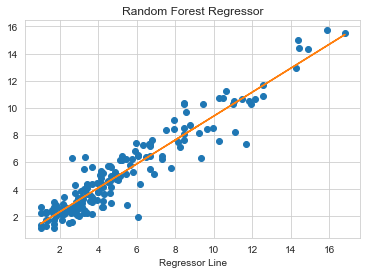

In [206]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rf1.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(rf1.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('Random Forest Regressor')

# Consider Primary Fuel As Target Variable

In [207]:
df2

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2,7.0,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,2,14.0,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,3.0,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2.0,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2,5.0,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [208]:
x2=df2.drop('primary_fuel',axis=1)
y2=df2['primary_fuel']

In [209]:
x2.skew()

capacity_mw             3.193257
latitude               -0.161811
longitude               1.150963
other_fuel1           -20.464435
commissioning_year      1.779021
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

In [210]:
# remove skewness
x2=power_transform(x2,method='yeo-johnson')
x2=pd.DataFrame(x2)

STANDARD SCALER

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
std=StandardScaler()
x2=std.fit_transform(x2)

In [213]:
x2

array([[-1.69572306,  1.15407872, -0.94566101, ...,  0.31414141,
         0.31812958,  0.31588978],
       [ 0.19251108,  0.5723039 , -0.53458397, ...,  0.31414141,
         0.31812958,  0.31588978],
       [-0.29492012,  0.09296396, -2.39087749, ...,  0.31414141,
         0.31812958,  0.31588978],
       ...,
       [-0.52559321, -0.98425999, -0.2685914 , ...,  0.31414141,
         0.31812958,  0.31588978],
       [ 0.08531829,  0.50212316, -0.78805285, ...,  0.31414141,
         0.31812958,  0.31588978],
       [-0.75867669, -1.81038883,  0.19542302, ...,  0.31414141,
         0.31812958,  0.31588978]])

SMOTE

In [214]:
y2.value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [215]:
from imblearn.over_sampling import SMOTE

In [216]:
smt=SMOTE()
trainx2,trainy2=smt.fit_resample(x2,y2)

In [218]:
trainy2.value_counts()

7    259
5    259
3    259
1    259
6    259
4    259
2    259
0    259
Name: primary_fuel, dtype: int64

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [220]:
lg=LogisticRegression()

Random state selection

In [221]:
x2_train,x2_test,y2_train,y2_test=train_test_split(trainx2,trainy2,test_size=0.25,random_state=500)

In [223]:
print(x2_test.shape)
print(y2_test.shape)
print(x2_train.shape)
print(y2_train.shape)

(518, 11)
(518,)
(1554, 11)
(1554,)


In [224]:
def fun(f):
    f.fit(x2_train,y2_train)
    pred=f.predict(x2_test)
    print("Accuracy Score",accuracy_score(y2_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y2_test,pred))
    print('Classification Report',classification_report(y2_test,pred))
    print('f1 score',f1_score(y2_test,pred,average='micro'))

In [225]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [226]:
svc=SVC()
svcl=SVC(kernel='linear')
svcp=SVC(kernel='poly')
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [227]:
fun(lg)

Accuracy Score 0.581081081081081
Confusion Matrix
 [[41  0  0  0  0  0  0 28]
 [ 9 23  7  1 12  1  0  2]
 [ 0 10 24 10  2  9  0  8]
 [ 2  8  8 49  4 10  0  0]
 [ 0  4  0  2 49  0  0  0]
 [ 1  2  2  1  0 28  0 26]
 [ 2  1  0  0  0  0 64  0]
 [35  6  0  0  0  4  0 23]]
Classification Report               precision    recall  f1-score   support

           0       0.46      0.59      0.52        69
           1       0.43      0.42      0.42        55
           2       0.59      0.38      0.46        63
           3       0.78      0.60      0.68        81
           4       0.73      0.89      0.80        55
           5       0.54      0.47      0.50        60
           6       1.00      0.96      0.98        67
           7       0.26      0.34      0.30        68

    accuracy                           0.58       518
   macro avg       0.60      0.58      0.58       518
weighted avg       0.60      0.58      0.58       518

f1 score 0.581081081081081


In [228]:
fun(svc)

Accuracy Score 0.7895752895752896
Confusion Matrix
 [[67  0  0  0  0  0  0  2]
 [ 8 33  4  0  7  1  0  2]
 [ 1  7 36  0  0 19  0  0]
 [ 0  7  8 61  2  3  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 1  1  0  0  0 58  0  0]
 [ 3  0  0  0  0  0 64  0]
 [24  4  0  0  0  5  0 35]]
Classification Report               precision    recall  f1-score   support

           0       0.64      0.97      0.77        69
           1       0.63      0.60      0.62        55
           2       0.75      0.57      0.65        63
           3       1.00      0.75      0.86        81
           4       0.86      1.00      0.92        55
           5       0.67      0.97      0.79        60
           6       1.00      0.96      0.98        67
           7       0.90      0.51      0.65        68

    accuracy                           0.79       518
   macro avg       0.81      0.79      0.78       518
weighted avg       0.82      0.79      0.78       518

f1 score 0.7895752895752896


In [229]:
fun(svcl)

Accuracy Score 0.694980694980695
Confusion Matrix
 [[67  0  0  0  0  0  0  2]
 [ 5 34  7  1  6  0  0  2]
 [ 1  7 28 13  1  5  0  8]
 [ 2  8 13 50  4  4  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  3  2  0  0 38  0 17]
 [ 1  2  0  0  0  0 64  0]
 [32 12  0  0  0  0  0 24]]
Classification Report               precision    recall  f1-score   support

           0       0.62      0.97      0.76        69
           1       0.52      0.62      0.56        55
           2       0.56      0.44      0.50        63
           3       0.78      0.62      0.69        81
           4       0.83      1.00      0.91        55
           5       0.81      0.63      0.71        60
           6       1.00      0.96      0.98        67
           7       0.45      0.35      0.40        68

    accuracy                           0.69       518
   macro avg       0.70      0.70      0.69       518
weighted avg       0.70      0.69      0.69       518

f1 score 0.694980694980695


In [230]:
fun(svcp)

Accuracy Score 0.7181467181467182
Confusion Matrix
 [[69  0  0  0  0  0  0  0]
 [17 28  4  0  6  0  0  0]
 [17  2 42  0  0  2  0  0]
 [ 5  5 10 57  2  0  0  2]
 [ 0  0  0  0 55  0  0  0]
 [31  0  0  0  0 29  0  0]
 [ 4  0  0  0  0  0 63  0]
 [39  0  0  0  0  0  0 29]]
Classification Report               precision    recall  f1-score   support

           0       0.38      1.00      0.55        69
           1       0.80      0.51      0.62        55
           2       0.75      0.67      0.71        63
           3       1.00      0.70      0.83        81
           4       0.87      1.00      0.93        55
           5       0.94      0.48      0.64        60
           6       1.00      0.94      0.97        67
           7       0.94      0.43      0.59        68

    accuracy                           0.72       518
   macro avg       0.83      0.72      0.73       518
weighted avg       0.84      0.72      0.73       518

f1 score 0.718146718146718


In [231]:
fun(dtc)

Accuracy Score 0.8474903474903475
Confusion Matrix
 [[66  1  0  0  0  0  0  2]
 [ 6 32  5  7  1  1  0  3]
 [ 1  8 45  2  0  6  0  1]
 [ 0  6 10 59  3  1  1  1]
 [ 0  2  0  1 52  0  0  0]
 [ 0  0  0  0  0 59  0  1]
 [ 0  0  0  0  0  0 66  1]
 [ 4  1  3  0  0  0  0 60]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.96      0.90        69
           1       0.64      0.58      0.61        55
           2       0.71      0.71      0.71        63
           3       0.86      0.73      0.79        81
           4       0.93      0.95      0.94        55
           5       0.88      0.98      0.93        60
           6       0.99      0.99      0.99        67
           7       0.87      0.88      0.88        68

    accuracy                           0.85       518
   macro avg       0.84      0.85      0.84       518
weighted avg       0.84      0.85      0.84       518

f1 score 0.8474903474903475


In [232]:
fun(knn)

Accuracy Score 0.861003861003861
Confusion Matrix
 [[67  1  0  0  0  0  0  1]
 [ 3 32  4  2  6  1  0  7]
 [ 1  2 42  2  0 13  1  2]
 [ 0  7  8 64  1  1  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  1  0  0 57  0  2]
 [ 0  0  0  0  0  0 66  1]
 [ 3  1  1  0  0  0  0 63]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.97      0.94        69
           1       0.74      0.58      0.65        55
           2       0.75      0.67      0.71        63
           3       0.94      0.79      0.86        81
           4       0.89      1.00      0.94        55
           5       0.79      0.95      0.86        60
           6       0.99      0.99      0.99        67
           7       0.83      0.93      0.88        68

    accuracy                           0.86       518
   macro avg       0.85      0.86      0.85       518
weighted avg       0.86      0.86      0.86       518

f1 score 0.861003861003861


In [233]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [234]:
rfc=RandomForestClassifier()
adc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [235]:
fun(rfc)

Accuracy Score 0.9015444015444015
Confusion Matrix
 [[67  1  0  0  0  0  0  1]
 [ 2 35  3  5  3  1  0  6]
 [ 1  3 54  0  0  3  0  2]
 [ 0  4  6 69  1  1  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0 59  0  1]
 [ 0  0  0  0  0  0 66  1]
 [ 4  1  1  0  0  0  0 62]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.97      0.94        69
           1       0.80      0.64      0.71        55
           2       0.84      0.86      0.85        63
           3       0.93      0.85      0.89        81
           4       0.93      1.00      0.96        55
           5       0.92      0.98      0.95        60
           6       1.00      0.99      0.99        67
           7       0.85      0.91      0.88        68

    accuracy                           0.90       518
   macro avg       0.90      0.90      0.90       518
weighted avg       0.90      0.90      0.90       518

f1 score 0.9015444015444015


In [236]:
fun(adc)

Accuracy Score 0.3590733590733591
Confusion Matrix
 [[ 0  0  0  0  0  0  0 69]
 [ 0  8  0  1 23  0  0 23]
 [ 0  2  0  8 37  0  0 16]
 [ 0  0  0  1 71  0  0  9]
 [ 0  9  0  0 46  0  0  0]
 [ 0  0  0  1 31  0  0 28]
 [ 0  0  0  1  0  0 63  3]
 [ 0  0  0  0  0  0  0 68]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.42      0.15      0.22        55
           2       0.00      0.00      0.00        63
           3       0.08      0.01      0.02        81
           4       0.22      0.84      0.35        55
           5       0.00      0.00      0.00        60
           6       1.00      0.94      0.97        67
           7       0.31      1.00      0.48        68

    accuracy                           0.36       518
   macro avg       0.26      0.37      0.25       518
weighted avg       0.25      0.36      0.25       518

f1 score 0.359073359073359


In [237]:
fun(gbc)

Accuracy Score 0.8957528957528957
Confusion Matrix
 [[67  2  0  0  0  0  0  0]
 [ 3 40  5  2  1  1  0  3]
 [ 1  4 44  4  0  7  0  3]
 [ 1  2  6 71  0  1  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0 58  0  2]
 [ 0  0  0  0  0  0 67  0]
 [ 5  1  0  0  0  0  0 62]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.97      0.92        69
           1       0.82      0.73      0.77        55
           2       0.80      0.70      0.75        63
           3       0.92      0.88      0.90        81
           4       0.98      1.00      0.99        55
           5       0.87      0.97      0.91        60
           6       1.00      1.00      1.00        67
           7       0.89      0.91      0.90        68

    accuracy                           0.90       518
   macro avg       0.89      0.89      0.89       518
weighted avg       0.89      0.90      0.89       518

f1 score 0.8957528957528957


# Hyper Tuning For Best Score

Random Forest Classifier

In [238]:
p1={'n_estimators':[10,50,100,250,500],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'bootstrap':['True','False']}

In [239]:
gd1=GridSearchCV(rfc,p1)
gd1.fit(x2,y2)
print(gd1.best_params_)

{'bootstrap': 'True', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 250}


In [240]:
rfc1=RandomForestClassifier(criterion='entropy',n_estimators=250,bootstrap=True,max_features='auto')

In [241]:
fun(rfc1)

Accuracy Score 0.9015444015444015
Confusion Matrix
 [[67  1  0  0  0  0  0  1]
 [ 2 36  3  5  3  1  0  5]
 [ 1  4 49  1  0  7  0  1]
 [ 0  3  5 70  1  2  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0 58  0  2]
 [ 0  0  0  0  0  0 66  1]
 [ 1  0  1  0  0  0  0 66]]
Classification Report               precision    recall  f1-score   support

           0       0.94      0.97      0.96        69
           1       0.82      0.65      0.73        55
           2       0.84      0.78      0.81        63
           3       0.92      0.86      0.89        81
           4       0.93      1.00      0.96        55
           5       0.85      0.97      0.91        60
           6       1.00      0.99      0.99        67
           7       0.87      0.97      0.92        68

    accuracy                           0.90       518
   macro avg       0.90      0.90      0.90       518
weighted avg       0.90      0.90      0.90       518

f1 score 0.9015444015444015


# Cross Validation

In [242]:
from sklearn.model_selection import cross_val_score

In [243]:
for i in range(2,16):
    score=cross_val_score(rfc1,trainx2,trainy2,cv=i)
    print('At value of cv=',i,score.mean())

At value of cv= 2 0.8972007722007722
At value of cv= 3 0.9102379104707173
At value of cv= 4 0.9102316602316602
At value of cv= 5 0.9073453233222747
At value of cv= 6 0.9126567255871101
At value of cv= 7 0.9131274131274133
At value of cv= 8 0.9111969111969112
At value of cv= 9 0.9083233996277476
At value of cv= 10 0.9097663507989596
At value of cv= 11 0.9102447985426708
At value of cv= 12 0.9121801765470271
At value of cv= 13 0.915566037735849
At value of cv= 14 0.9097490347490348
At value of cv= 15 0.9150870607861535


In [244]:
# auc roc score
from sklearn.metrics import roc_curve,roc_auc_score

In [245]:
y_pred_prob=rfc1.predict_proba(x2_test)
print('ROC score:',roc_auc_score(y2_test,y_pred_prob,multi_class='ovo'))

ROC score: 0.9888052461234681


# Saving Model On Accuracy Score and cross validation score

In [246]:
import pickle
filename='Poweplant_Primary_Fuel _Prediction.pkl'
pickle.dump(rfc1,open(filename,'wb'))

# Conclusion

In [247]:
res=pd.DataFrame()
res['Actual']=y2_test
res['Predict']=rfc1.predict(x2_test)

print(res)

      Actual  Predict
808        3        3
395        6        6
417        2        2
229        1        3
251        6        7
...      ...      ...
760        6        6
1071       0        0
589        3        3
348        0        0
488        1        7

[518 rows x 2 columns]
